<a href="https://www.kaggle.com/code/vincentyuan1218/credit-card-fraud-h2o-xgboost-vs-tensorflow?scriptVersionId=103241562" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Data processing

In [2]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Check the distribution of target class as mostly credit card fraud rate is tiny
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Normally, the the summary of the data implies:
* General distribution - pencentiles
* Outlier - min and max values

But this dataset has removed the name of those fields so we will not do too much processing based on this.

In [6]:
df.shape

(284807, 31)

In [7]:
# check missing values in fields
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

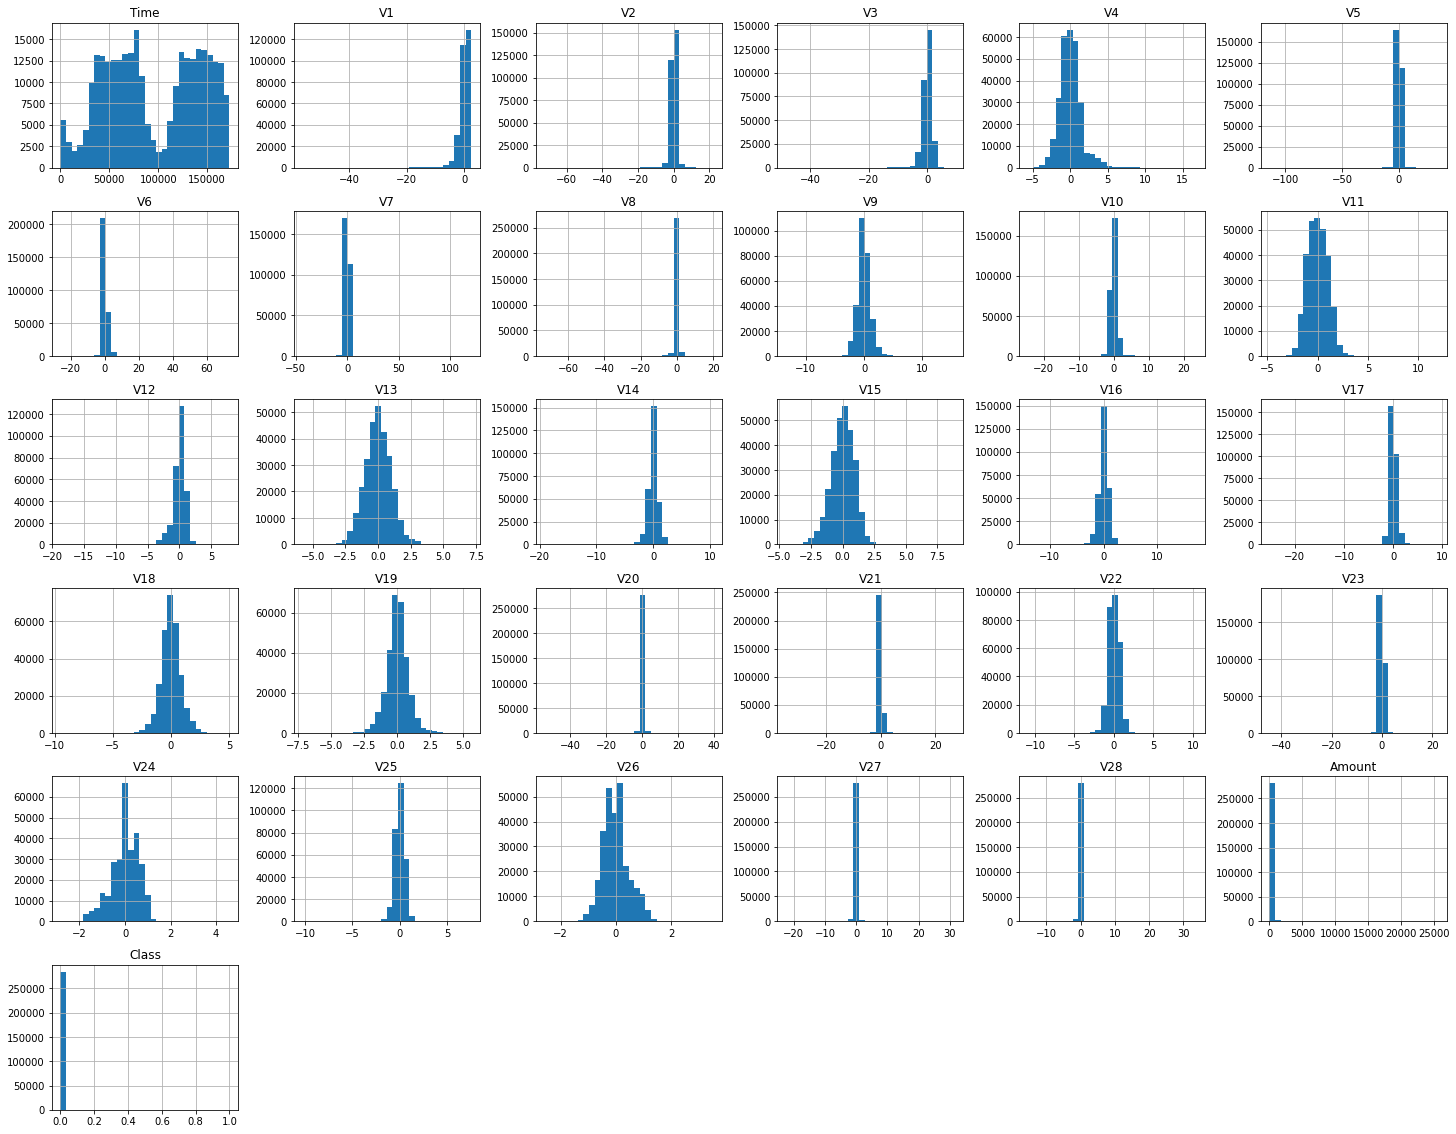

In [8]:
# Check the data distribution
df.hist(bins=30, figsize=(25, 20))

The `Amount` column covers a huge range. Convert to log-space.

In [9]:
eps = 0.001 # 0 => 0.1¢
df['Log_Amount'] = np.log(df.pop('Amount')+eps)

## Split the dataset

In this practice out-of-time validation is applied to ensure that the model scale the prediction lesson over time. To this end, in the split of dataset, the `time` field was used to create the 10% out-of-time(oot) dataset and that will be our test set.

In [10]:
oot_index = int(df.shape[0] - 0.1*df.shape[0])
print(f'There are {df.shape[0]} observations.')
print(f'The out-of-time set will start from {oot_index}th row.')      

There are 284807 observations.
The out-of-time set will start from 256326th row.


In [11]:
from sklearn.model_selection import train_test_split

df.sort_values(by='Time', ascending=True, inplace=True)

train_set = df.iloc[:oot_index]
oot_set = df.iloc[oot_index:]

print(f'Shape of training set:{train_set.shape}')
print(f'Shape of out-of-time set:{oot_set.shape}')

Shape of training set:(256326, 31)
Shape of out-of-time set:(28481, 31)


Verify the time period of training set and oot set.

<AxesSubplot:>

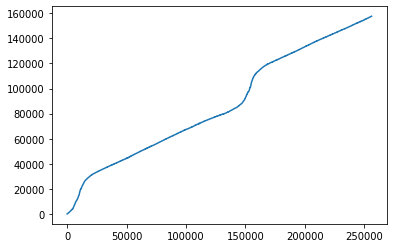

In [12]:
train_set['Time'].plot()

<AxesSubplot:>

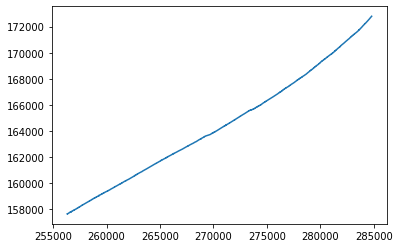

In [13]:
oot_set['Time'].plot()

verify the fraud ratio of training set and oot set.

In [14]:
train_set_class_ratio = train_set['Class'].value_counts()
train_set_class_ratio

0    255856
1       470
Name: Class, dtype: int64

In [15]:
print(f'Fraud rate of training set: {train_set_class_ratio[1]/(train_set_class_ratio[0]+train_set_class_ratio[1]) :.1%}')

Fraud rate of training set: 0.2%


In [16]:
oot_set_class_ratio = oot_set['Class'].value_counts()
oot_set_class_ratio

0    28459
1       22
Name: Class, dtype: int64

In [17]:
print(f'Fraud rate of out-of-time set: {oot_set_class_ratio[1]/(oot_set_class_ratio[0]+oot_set_class_ratio[1]) :.1%}')

Fraud rate of out-of-time set: 0.1%


## Scale the dataset

This scaling does not help with XGBoost model as it does not need, while it is suggested to normalize the data before using Neural Nets so this scaling is performed.

**Note:** 
- the fit process should only be done on the training set so that it does not get a chance to peek at the information in the test set.
- Normalize the input features using the `sklearn StandardScaler`. This will set the mean to 0 and standard deviation to 1

In [18]:
from sklearn.preprocessing import StandardScaler
# All fields are numeric but the scalers vary, some algorithms are sensitive to scale, while some are not, so experiments are necesary. First make a copy of scaled dataframe
scaler = StandardScaler()

In [19]:
train_X = train_set.drop("Class", axis=1)
train_y = train_set["Class"]

oot_X = oot_set.drop("Class", axis=1)
oot_y = oot_set["Class"]

# Deep copy by default
scaled_train_X = scaler.fit_transform(train_X)
scaled_oot_X = scaler.transform(oot_X)

In [20]:
df_scaled_train_X = pd.DataFrame(scaled_train_X)
df_scaled_train_X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.995185,-0.679770,-0.032874,1.627669,0.959743,-0.223427,0.337369,0.206301,0.081017,0.327341,...,0.317720,-0.023119,0.398166,-0.166818,0.108882,0.216578,-0.392453,0.334050,-0.065832,1.003021
1,-1.995185,0.622734,0.170690,0.056983,0.302985,0.066673,-0.073451,-0.053400,0.069646,-0.230495,...,-0.093528,-0.304146,-0.877316,0.167386,-0.562555,0.291378,0.257313,-0.020879,0.042360,-0.974775
2,-1.995162,-0.679028,-0.794070,1.121881,0.254700,-0.343503,1.346501,0.656420,0.205612,-1.364911,...,0.668752,0.337605,1.085433,1.442772,-1.139344,-0.666712,-0.289281,-0.136340,-0.182859,1.460056
3,-1.995162,-0.478889,-0.100409,1.134993,-0.623145,0.015456,0.929235,0.204678,0.314134,-1.249932,...,-0.271830,-0.145020,0.018846,-0.292833,-1.942040,1.221185,-0.460138,0.157669,0.183684,0.908588
4,-1.995139,-0.576876,0.538011,0.973094,0.271122,-0.273585,0.061000,0.494500,-0.227782,0.736298,...,0.519344,-0.011096,1.122450,-0.209405,0.231588,-0.431199,1.033704,0.547851,0.648467,0.629070


Check the distribution after scaling

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>],
       [<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>],
       [<AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>],
       [<AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSub

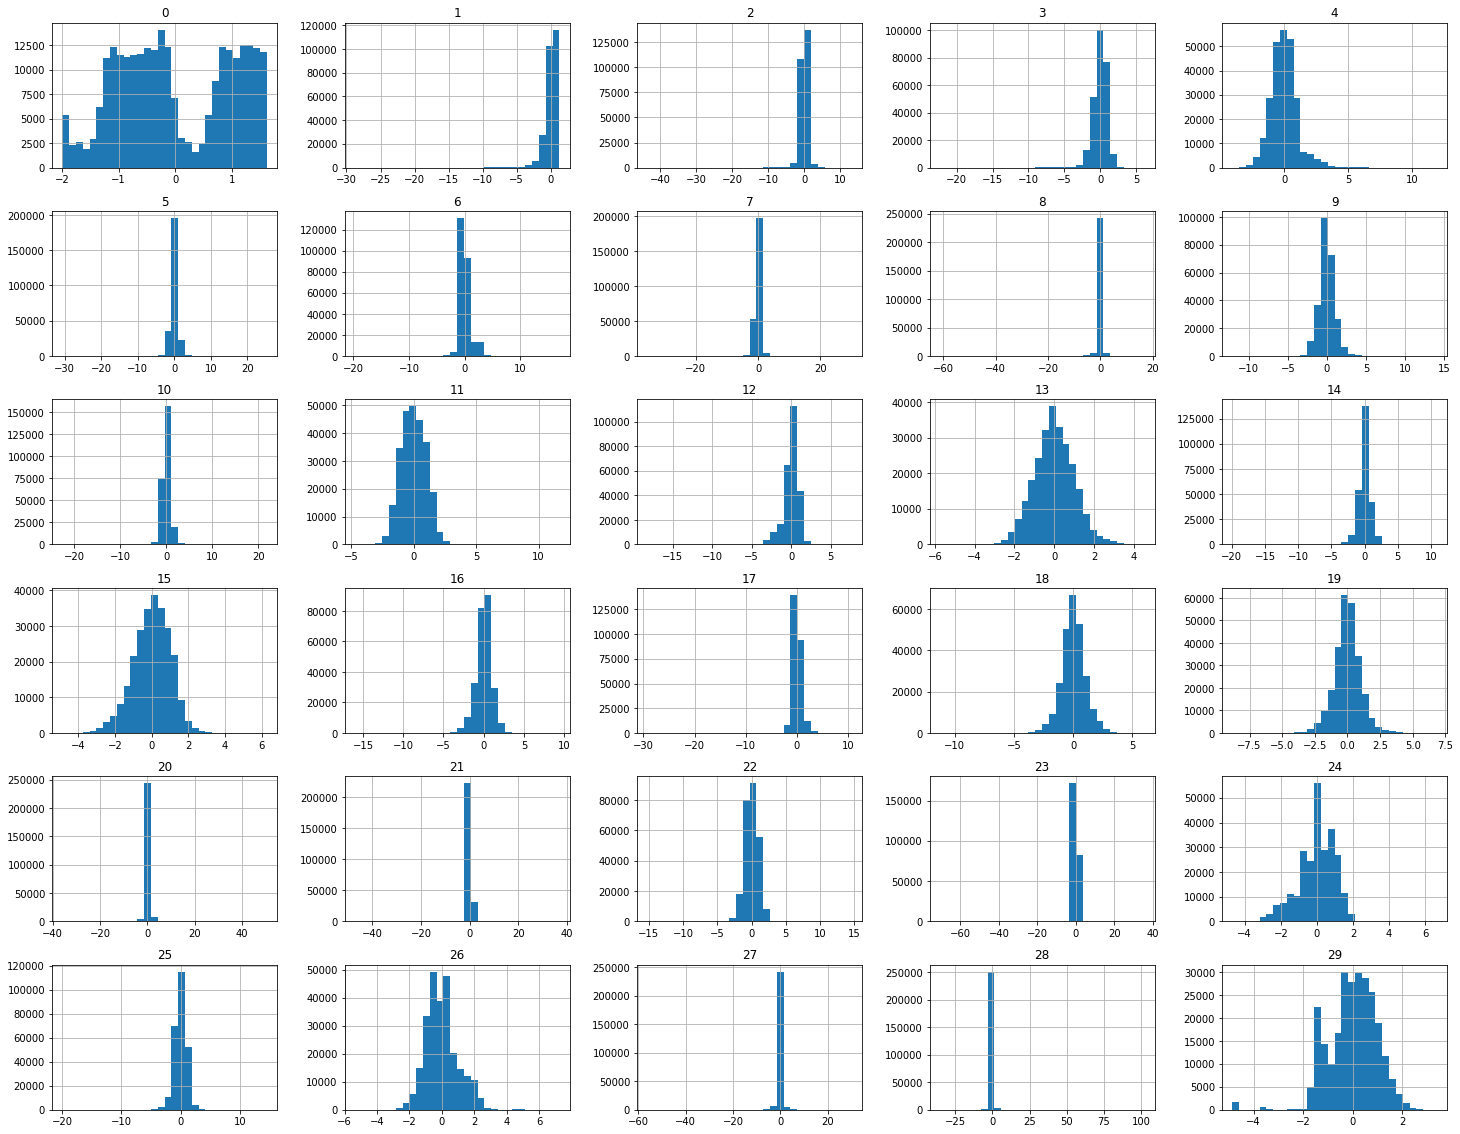

In [21]:
df_scaled_train_X.hist(bins=30, figsize=(25, 20))

# Modeling Experiments with H2O

In [22]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpjeoulsu6
  JVM stdout: /tmp/tmpjeoulsu6/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpjeoulsu6/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,"1 year, 2 months and 25 days !!!"
H2O_cluster_name:,H2O_from_python_unknownUser_eunh4q
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.910 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


Creating H2O frames based on the scaled arrays created earlier

In [23]:
train_X_frame = h2o.H2OFrame(scaled_train_X)
train_y_frame = h2o.H2OFrame(np.array(train_y))


oot_X_frame = h2o.H2OFrame(scaled_oot_X)
oot_y_frame = h2o.H2OFrame(np.array(oot_y))

# Concatenate the labels to the features
train_h2o_df = train_X_frame.cbind(train_y_frame)
oot_h2o_df = oot_X_frame.cbind(oot_y_frame)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


Convert the class label as categorical type so that H2O algorithm will take this as a classification task.

In [24]:
train_h2o_df['C110'] = train_h2o_df['C110'].asfactor()
oot_h2o_df['C110'] = oot_h2o_df['C110'].asfactor()

In the below context, oot_set is renamed as test_set, and also, it is going to split the train_frame to get a validation frame.

In [25]:
# Construct the h2o data frame and split the data into train/valid/test set with 0.7/0.2/0.1 ratio

train_frame, valid_frame = train_h2o_df.split_frame(
    ratios=[0.8], 
    seed=1234
)

test_frame = oot_h2o_df

In [26]:
print(f'Shape of train_frame:{train_frame.shape}')
print(f'Shape of valid_frame:{valid_frame.shape}')
print(f'Shape of test_frame:{test_frame.shape}')

Shape of train_frame:(205214, 31)
Shape of valid_frame:(51112, 31)
Shape of test_frame:(28481, 31)


In [27]:
predictors = train_frame.columns[:-1]
response = train_frame.columns[-1]

print(f'Modeling experiments on fields: {predictors} -> predict the target: {response}')

Modeling experiments on fields: ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30'] -> predict the target: C110


# XGBoost

Please note that in the prior version, other models like random forest, GBM have been tested and their performance is not as good as XGBoost, so in this version, the focus is to improve the XGBoost model and push the performance to the limit.

In [28]:
from h2o.estimators import H2OXGBoostEstimator

# Build and train the model:
xgb = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234)

xgb.train(x=predictors,
               y=response,
               training_frame=train_frame,
               validation_frame=valid_frame)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [29]:
xgb_perf = xgb.model_performance(valid_frame)
print(f"F1 score of the XGBoost: {xgb_perf.F1()}")
print(f"AUC of the XGBoost: {xgb_perf.auc()}")


xgb_perf

F1 score of the XGBoost: [[0.7001581788063049, 0.8743169398907104]]
AUC of the XGBoost: 0.9751069778344957

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.0004493236194201368
RMSE: 0.021197254997290024
LogLoss: 0.0032023702604143107
Mean Per-Class Error: 0.052782029946720765
AUC: 0.9751069778344957
AUCPR: 0.8285936824027585
Gini: 0.9502139556689915

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7001581788063049: 


,,0,1,Error,Rate
0,0,51009.0,6.0,0.0001,(6.0/51015.0)
1,1,17.0,80.0,0.1753,(17.0/97.0)
2,Total,51026.0,86.0,0.0004,(23.0/51112.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.700158,0.874317,75.0
1,max f2,0.700158,0.843882,75.0
2,max f0point5,0.700158,0.907029,75.0
3,max accuracy,0.700158,0.999550,75.0
4,max precision,0.999734,1.000000,0.0
5,max recall,0.000007,1.000000,393.0
6,max specificity,0.999734,1.000000,0.0
7,max absolute_mcc,0.700158,0.875681,75.0
8,max min_per_class_accuracy,0.000136,0.927835,341.0
9,max mean_per_class_accuracy,0.000702,0.947218,276.0



Gains/Lift Table: Avg response rate:  0.19 %, avg score:  0.18 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010017,1.071904e-03,89.536566,89.536566,0.169922,0.172218,0.169922,0.172218,0.896907,0.896907,8853.656572,8853.656572,0.888576
1,2,0.020015,4.795795e-04,1.031170,45.327126,0.001957,0.000702,0.086022,0.086544,0.010309,0.907216,3.116993,4432.712560,0.888889
2,3,0.030013,3.004571e-04,1.031170,30.571432,0.001957,0.000374,0.058018,0.057839,0.010309,0.917526,3.116993,2957.143241,0.889201
3,4,0.040010,2.139033e-04,0.000000,22.932312,0.000000,0.000254,0.043521,0.043450,0.000000,0.917526,-100.000000,2193.231165,0.879184
4,5,0.050008,1.644976e-04,0.000000,18.347644,0.000000,0.000187,0.034820,0.034801,0.000000,0.917526,-100.000000,1734.764371,0.869167
5,6,0.100016,7.626777e-05,0.412307,9.379975,0.000782,0.000110,0.017801,0.017455,0.020619,0.938144,-58.769340,837.997515,0.839722
6,7,0.150004,4.714185e-05,0.206234,6.322859,0.000391,0.000060,0.011999,0.011658,0.010309,0.948454,-79.376601,532.285911,0.799968
7,8,0.200012,3.349596e-05,0.000000,4.741990,0.000000,0.000040,0.008999,0.008753,0.000000,0.948454,-100.000000,374.198971,0.749865
8,9,0.300008,2.028990e-05,0.206194,3.230156,0.000391,0.000026,0.006130,0.005844,0.020619,0.969072,-79.380636,223.015629,0.670336
9,10,0.400063,1.382226e-05,0.000000,2.422301,0.000000,0.000017,0.004597,0.004387,0.000000,0.969072,-100.000000,142.230128,0.570091


### Cross-validation of XGBoost

It's important to know how CV works in H2O some practices are prone to be misleading, such as evaluating the performance of CV, below are some reference:
- [Cross-Validation in H2O](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/cross-validation.html)

In [30]:
xgb_cv = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234,
                            nfolds = 5)

# During cross-validation, the train set and validation set are combined together in order to get more data in training
xgb_cv.train(x=predictors,
               y=response,
               training_frame=train_frame.rbind(valid_frame)
               )

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [31]:
xgb_cv_summary = xgb_cv.cross_validation_metrics_summary().as_data_frame()
xgb_cv_summary

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.9995747,6.112938E-5,0.99953246,0.99966854,0.9995724,0.99958974,0.99951047
1,auc,0.9792627,0.008880658,0.9710229,0.9908158,0.9706449,0.9855038,0.9783261
2,err,4.2527998E-4,6.112938E-5,4.6756282E-4,3.3145508E-4,4.27583E-4,4.1028447E-4,4.895146E-4
3,err_count,21.8,3.1144824,24.0,17.0,22.0,21.0,25.0
4,f0point5,0.9139084,0.016217358,0.8959538,0.94008267,0.91463417,0.9080189,0.91085273
5,f1,0.87202203,0.031151565,0.8378378,0.91457283,0.8450704,0.88,0.8826291
6,f2,0.83446276,0.046506707,0.78680205,0.89041096,0.7853403,0.85365856,0.856102
7,lift_top_group,89.89255,3.5200405,86.467445,93.24923,86.16961,93.44905,90.127396
8,logloss,0.0028339506,5.925941E-4,0.0032774548,0.0019578736,0.003062754,0.002507261,0.00336441
9,max_per_class_error,0.18853204,0.055461712,0.24390244,0.125,0.25,0.16304348,0.16071428


In [32]:
## Get the cross-validated AUC by scoring the combined holdout predictions.
## (Instead of taking the average of the metrics across the folds)
print(f"F1 score of cross-validation: {xgb_cv.F1(xval=True)}")
print(f"auc of cross-validation: {xgb_cv.auc(xval=True)}")

F1 score of cross-validation: [[0.2707018256187439, 0.8688711516533637]]
auc of cross-validation: 0.9792218187557629


By far, XGBoost gives the best cross-validation results with the default hyper params. Next, a random search is performed to see if a better-perfoming model can be found.

In [33]:
# Retrieve the variable importance, the least a few unimportant features can be discarded in the training to see if the performance gets better.
varimp = xgb_cv.varimp(use_pandas=True)
varimp

,variable,relative_importance,scaled_importance,percentage
0,C15,2079.674316,1.000000,0.305106
1,C11,1555.308716,0.747862,0.228177
2,C13,468.779358,0.225410,0.068774
3,C5,293.854858,0.141298,0.043111
4,C30,177.887268,0.085536,0.026098
5,C8,165.753464,0.079702,0.024317
6,C1,160.188873,0.077026,0.023501
7,C17,137.852173,0.066285,0.020224
8,C27,136.365463,0.065571,0.020006
9,C2,134.270966,0.064563,0.019699


Inspect the vairable importance and discard the least important features to test if the reduction of noise helps improve the model performance.

In [34]:
least_imp_vars = varimp[-3:]['variable']

In [35]:
print(predictors)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30']


In [36]:
# Remove the least important features
for i in least_imp_vars:
    if i in predictors:
        predictors.remove(i)

Train a new model with less features

In [37]:
xgb_cv_2 = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234,
                            nfolds = 5)

# During cross-validation, the train set and validation set are combined together in order to get more data in training
xgb_cv_2.train(x=predictors,
               y=response,
               training_frame=train_frame.rbind(valid_frame)
               )

xgb_cv_summary_2 = xgb_cv_2.cross_validation_metrics_summary().as_data_frame()
xgb_cv_summary_2

xgboost Model Build progress: |███████████████████████████████████████████| 100%


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.9995826,5.5969787E-5,0.9995519,0.99966854,0.99953353,0.99960923,0.9995496
1,auc,0.9816301,0.006340326,0.97450596,0.9905318,0.97746,0.9805291,0.98512346
2,err,4.1741817E-4,5.596979E-5,4.4808103E-4,3.3145508E-4,4.6645416E-4,3.907471E-4,4.5035343E-4
3,err_count,21.4,2.8809721,23.0,17.0,24.0,20.0,23.0
4,f0point5,0.90903085,0.02488578,0.88797814,0.94008267,0.8806818,0.91121495,0.9251968
5,f1,0.8758886,0.031502053,0.8496732,0.91457283,0.8378378,0.8863636,0.89099526
6,f2,0.84519607,0.037514575,0.81453633,0.89041096,0.7989691,0.86283183,0.8592322
7,lift_top_group,88.56877,3.5107405,85.249596,93.24923,84.92078,90.1892,89.23505
8,logloss,0.0027457469,5.165614E-4,0.0031310385,0.0019533557,0.0029953492,0.0024956297,0.0031533614
9,max_per_class_error,0.17404105,0.041124526,0.20731707,0.125,0.225,0.1521739,0.16071428


In [38]:
print(f"F1 score of cross-validation: {xgb_cv_2.F1(xval=True)}")
print(f"auc of cross-validation: {xgb_cv_2.auc(xval=True)}")

F1 score of cross-validation: [[0.28303438425064087, 0.8733031674208144]]
auc of cross-validation: 0.981648715800244


Once some less important features are discarded, the model performance get a `better AUC to 0.982 against the 0.979, and F1 of 0.873 against 0.869 earlier`, here are some thoughts:

- in this case, there are not many features so if the performance does not get better, can just keep those features anyway
- but in cases where there are tons of features like 1000, if the performance does not get worse too much, in fact the unimportant features can be discarded and this is an efficient way for feature selection

Here, due to the lift of performance resulted from the removal of unimportant features, we can discard them.

In [39]:
# check the performance on the validation frame
xgb_cv_2_perf = xgb_cv_2.model_performance(valid_frame)
xgb_cv_2_perf


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 3.396376952083669e-05
RMSE: 0.005827844328809469
LogLoss: 0.0002284220427060497
Mean Per-Class Error: 9.801038910128845e-06
AUC: 0.9999997979167234
AUCPR: 0.9998942628848744
Gini: 0.9999995958334469

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3984886705875397: 


,,0,1,Error,Rate
0,0,51014.0,1.0,0.0,(1.0/51015.0)
1,1,0.0,97.0,0.0,(0.0/97.0)
2,Total,51014.0,98.0,0.0,(1.0/51112.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.398489,0.994872,81.0
1,max f2,0.398489,0.997942,81.0
2,max f0point5,0.492030,0.997921,79.0
3,max accuracy,0.492030,0.999980,79.0
4,max precision,0.999691,1.000000,0.0
5,max recall,0.398489,1.000000,81.0
6,max specificity,0.999691,1.000000,0.0
7,max absolute_mcc,0.398489,0.994875,81.0
8,max min_per_class_accuracy,0.398489,0.999980,81.0
9,max mean_per_class_accuracy,0.398489,0.999990,81.0



Gains/Lift Table: Avg response rate:  0.19 %, avg score:  0.19 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010017,1.359285e-03,99.828125,99.828125,0.189453,0.186275,0.189453,0.186275,1.0,1.0,9882.8125,9882.812500,0.991865
1,2,0.020015,6.044611e-04,0.000000,49.962854,0.000000,0.000897,0.094819,0.093677,0.0,1.0,-100.0000,4896.285435,0.981848
2,3,0.030013,3.746978e-04,0.000000,33.319426,0.000000,0.000475,0.063233,0.062630,0.0,1.0,-100.0000,3231.942634,0.971832
3,4,0.040010,2.670143e-04,0.000000,24.993643,0.000000,0.000313,0.047433,0.047058,0.0,1.0,-100.0000,2399.364303,0.961815
4,5,0.050008,2.022416e-04,0.000000,19.996870,0.000000,0.000232,0.037950,0.037697,0.0,1.0,-100.0000,1899.687011,0.951798
5,6,0.100016,9.264034e-05,0.000000,9.998435,0.000000,0.000134,0.018975,0.018915,0.0,1.0,-100.0000,899.843505,0.901696
6,7,0.150004,5.813081e-05,0.000000,6.666493,0.000000,0.000073,0.012652,0.012636,0.0,1.0,-100.0000,566.649276,0.851612
7,8,0.200012,4.081586e-05,0.000000,4.999707,0.000000,0.000048,0.009488,0.009489,0.0,1.0,-100.0000,399.970654,0.801509
8,9,0.300008,2.472982e-05,0.000000,3.333246,0.000000,0.000032,0.006326,0.006337,0.0,1.0,-100.0000,233.324638,0.701323
9,10,0.400004,1.688773e-05,0.000000,2.499976,0.000000,0.000020,0.004744,0.004758,0.0,1.0,-100.0000,149.997554,0.601137


In [40]:
# predictors.extend(least_imp_vars)
# print(predictors)

## XGBoost random search

**Note:**

- For the set up of search space of each param, it is suggested to extend the lower and upper bound of the default value, say the `default value of learn_rate` is 0.3, then a search space from `0.1 - 0.5` is better than a space from `0.01 - 0.3`. 
- But for param like the sample rate whose upper limit should not exceed 1.0, then the search space should be within `(0.0 - 1.0]`.
- Not every param is searchable, need to check the lagel hyperparameters doc below, otherwise it throws errors for the searching space setup
- Add cross validation in the random search is going to significantly increase the training time

**Ref:**
- [GBM Hyper Param Tuning](https://github.com/h2oai/h2o-3/blob/master/h2o-docs/src/product/tutorials/gbm/gbmTuning.ipynb)
- [Legal XGBoost Hyperparameters for searching](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html#xgboost-hyperparameters)

In [41]:
from h2o.grid.grid_search import H2OGridSearch

# XGB hyperparameters
xgb_params = {'learn_rate': [i * 0.02 for i in range(1, 26,2)],
                'max_depth': list(range(2, 15)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)],
              'ntrees': [i for i in range(25, 300, 25)],
              'gamma': [ i * 1e-8 for i in [10, 100, 1000, 10000]]
             }

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 64, 'seed': 1234}

#  Adding early stopping in the XGBoost model
xgb_search = H2OXGBoostEstimator(booster='dart',
                            normalize_type="tree",
                            stopping_metric='AUC',
                         stopping_rounds=3
                                )


# Train and validate a random grid of XGBoost,
xgb_grid = H2OGridSearch(model=xgb_search,
                          grid_id='xgb_random_search',
                          hyper_params=xgb_params,
                          search_criteria=search_criteria,
                          )

xgb_grid.train(x=predictors, y=response,
                training_frame=train_frame,
                validation_frame=valid_frame,
                seed=1234)

xgboost Grid Build progress: |████████████████████████████████████████████| 100%


Get the result of random search and check the performance of the best model based on `F1 and AUC` respectively

In [42]:
type(xgb_grid)

h2o.grid.grid_search.H2OGridSearch

In [43]:
xgb_gridperf = xgb_grid.get_grid(sort_by='F1', decreasing=True)
xgb_gridperf

           col_sample_rate   gamma learn_rate max_depth ntrees  \
0                      1.0  1.0E-7       0.46         9    200   
1                      1.0  1.0E-6       0.46         5    100   
2                      0.9  1.0E-5       0.46         8    125   
3       0.6000000000000001  1.0E-6       0.42        12    250   
4                      0.5  1.0E-4        0.5         9    250   
.. ..                  ...     ...        ...       ...    ...   
59                     0.1  1.0E-7       0.14         3     50   
60                     0.1  1.0E-7       0.06        12    275   
61                     1.0  1.0E-6       0.22         2    125   
62      0.7000000000000001  1.0E-7       0.06         2    100   
63     0.30000000000000004  1.0E-7        0.1         2    225   

           sample_rate                   model_ids                  f1  
0                  0.5  xgb_random_search_model_11  0.8913043478260869  
1   0.6000000000000001   xgb_random_search_model_5  0.8901098

In [44]:
# Grab the top XGBoost model, chosen by validation F1
best_xgb = xgb_gridperf.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_xgb_perf = best_xgb.model_performance(valid_frame)

print(f"F1 of the best XGBoost model: {best_xgb_perf.F1()}")
print(f"AUC of the best XGBoost model: {best_xgb_perf.auc()}")
print(f"Recall of the best XGBoost model: {best_xgb_perf.recall()}")

best_xgb_perf

F1 of the best XGBoost model: [[0.423682302236557, 0.8913043478260869]]
AUC of the best XGBoost model: 0.9738730573482026
Recall of the best XGBoost model: [[3.2099411909873816e-08, 1.0]]

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.00038554117670952867
RMSE: 0.019635202487102817
LogLoss: 0.0037826669989696328
Mean Per-Class Error: 0.051871240619546954
AUC: 0.9738730573482026
AUCPR: 0.8328195214198675
Gini: 0.9477461146964052

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.423682302236557: 


,,0,1,Error,Rate
0,0,51010.0,5.0,0.0001,(5.0/51015.0)
1,1,15.0,82.0,0.1546,(15.0/97.0)
2,Total,51025.0,87.0,0.0004,(20.0/51112.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,4.236823e-01,0.891304,63.0
1,max f2,4.236823e-01,0.863158,63.0
2,max f0point5,9.609936e-01,0.929095,54.0
3,max accuracy,5.899491e-01,0.999609,61.0
4,max precision,9.999976e-01,1.000000,0.0
5,max recall,3.209941e-08,1.000000,399.0
6,max specificity,9.999976e-01,1.000000,0.0
7,max absolute_mcc,4.236823e-01,0.892433,63.0
8,max min_per_class_accuracy,7.571641e-05,0.917526,336.0
9,max mean_per_class_accuracy,7.571641e-05,0.948129,336.0



Gains/Lift Table: Avg response rate:  0.19 %, avg score:  0.17 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010017,2.870650e-04,86.449098,86.449098,0.164062,1.689769e-01,0.164062,0.168977,0.865979,0.865979,8544.909794,8544.909794,0.857590
1,2,0.020015,8.903908e-05,3.093510,44.812045,0.005871,1.570094e-04,0.085044,0.084649,0.030928,0.896907,209.350979,4381.204462,0.878560
2,3,0.030013,4.892595e-05,2.062340,30.571432,0.003914,6.603843e-05,0.058018,0.056473,0.020619,0.917526,106.233986,2957.143241,0.889201
3,4,0.040010,3.232698e-05,0.000000,22.932312,0.000000,3.977710e-05,0.043521,0.042372,0.000000,0.917526,-100.000000,2193.231165,0.879184
4,5,0.050008,2.258422e-05,0.000000,18.347644,0.000000,2.698293e-05,0.034820,0.033906,0.000000,0.917526,-100.000000,1734.764371,0.869167
5,6,0.100016,7.091705e-06,0.206153,9.276899,0.000391,1.254787e-05,0.017606,0.016959,0.010309,0.927835,-79.384670,827.689850,0.829393
6,7,0.150004,3.423640e-06,0.206234,6.254132,0.000391,4.948636e-06,0.011869,0.011309,0.010309,0.938144,-79.376601,525.413238,0.789639
7,8,0.200012,1.992949e-06,0.412307,4.793533,0.000782,2.613764e-06,0.009097,0.008482,0.020619,0.958763,-58.769340,379.353308,0.760194
8,9,0.300008,8.810985e-07,0.000000,3.195793,0.000000,1.326746e-06,0.006065,0.005656,0.000000,0.958763,-100.000000,219.579292,0.660008
9,10,0.400004,4.435502e-07,0.309290,2.474203,0.000587,6.344649e-07,0.004696,0.004242,0.030928,0.989691,-69.070955,147.420260,0.590808


Check out the best grid model's params

In [45]:
params_list = []
for key, value in best_xgb.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
params_list

["model_id = {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'xgb_random_search_model_11', 'type': 'Key<Model>', 'URL': '/3/Models/xgb_random_search_model_11'}",
 "training_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_5_sid_9895', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_5_sid_9895'}",
 "validation_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_6_sid_9895', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_6_sid_9895'}",
 'nfolds = 0',
 'keep_cross_validation_models = True',
 'keep_cross_validation_predictions = False',
 'keep_cross_validation_fold_assignment = False',
 'score_each_iteration = False',
 'fold_assignment = None',
 'fold_column = None',
 "response_column = {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'C110', 'is_member_of_frames'

Now, we are going to use the params of the best model to train a new model and see the CV results

In [46]:
best_xgb_model = h2o.get_model(xgb_gridperf.sorted_metric_table()['model_ids'][0])
#get the parameters from the Random grid search model and modify them slightly
params = best_xgb_model.params
new_params = {"nfolds":5, "model_id":None, "training_frame":None, "validation_frame":None, 
              "response_column":None, "ignored_columns":None}
for key in new_params.keys():
    params[key]['actual'] = new_params[key] 
xgb_best = H2OXGBoostEstimator()
for key in params.keys():
    if key in dir(xgb_best) and getattr(xgb_best,key) != params[key]['actual']:
        setattr(xgb_best,key,params[key]['actual']) 

In [47]:
xgb_best.train(x=predictors, y=response, training_frame=train_frame.rbind(valid_frame))

/opt/conda/lib/python3.7/site-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


xgboost Model Build progress: |███████████████████████████████████████████| 100%


Check the CV results

In [48]:
print(xgb_best.cross_validation_metrics_summary())


Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.999567,5.8994126E-5,0.999513,0.99964905,0.99953353,0.99960923,0.9995301
1,auc,0.97913593,0.011385298,0.9705383,0.98826295,0.9642087,0.9905067,0.9821629
2,err,4.3302646E-4,5.8994126E-5,4.870446E-4,3.5095244E-4,4.6645416E-4,3.907471E-4,4.6993402E-4
3,err_count,22.2,3.0331502,25.0,18.0,24.0,20.0,24.0
4,f0point5,0.90963495,0.02844765,0.8798883,0.94827586,0.8866279,0.9059633,0.92741936
5,f1,0.8699052,0.03300291,0.8344371,0.9072165,0.8356164,0.8876405,0.88461536
6,f2,0.83376074,0.039574727,0.7934509,0.8695652,0.7901554,0.87004405,0.8455882
7,lift_top_group,89.43171,3.4472706,88.90315,92.2879,83.67194,91.27582,91.019745
8,logloss,0.0034720907,7.8905775E-4,0.004068409,0.0025010419,0.004144798,0.0027336164,0.0039125877
9,max_per_class_error,0.18858585,0.044143885,0.23170732,0.15384616,0.2375,0.14130434,0.17857143


It turns out that the CV results of the best model from grid search does not perform better compared to `xgb_cv_2` that used default params and discarded unimportant features. It means that the grid search results rank might not be stable across different folds of the data. It is a good practice to check the CV result instead of relying on a single training result as this example shows.

## Model performance on the out-of-time set

The best model is similar to the model built with default param in terms of performance. It is not guranteed that searching can find better models. Note that there is limited feature engineerin done, so with better feature engineering such as manipulation with the top important features, it is expected that a better-performing model can be built.

Given the default hyper param returns a better model(named `xgb_cv_2`) based on the results of cross-validation, so it should be used for the scoring of the hold-out set.

In [54]:
# The label predict is based on the threshold that gives max F1
xgb_pred = xgb_cv_2.predict(test_frame)
xgb_pred.head()

xgboost prediction progress: |████████████████████████████████████████████| 100%


predict,p0,p1
0,0.999862,0.000137752
0,0.99994,6.04774e-05
0,0.999995,5.24969e-06
0,0.999995,5.3634e-06
0,0.999996,3.94145e-06
0,0.999973,2.67435e-05
0,0.995951,0.004049
0,0.999991,8.64832e-06
0,0.999984,1.6379e-05
0,0.999986,1.40223e-05


Peformance attributes of the best model on the `test set`:

In [55]:
xgb_cv_test_perf = xgb_cv_2.model_performance(test_frame)
print(f"F1 score of cross-validation: {xgb_cv_test_perf.F1()}")
print(f"AUC of cross-validation: {xgb_cv_test_perf.auc()}")
print(f"Recall of cross-validation: {xgb_cv_test_perf.recall()}")

xgb_cv_test_perf

F1 score of cross-validation: [[0.28522828221321106, 0.7499999999999999]]
AUC of cross-validation: 0.925392670157068
Recall of cross-validation: [[6.368943445940405e-06, 1.0]]

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.0003374853108001931
RMSE: 0.018370773277143048
LogLoss: 0.0025024759054094346
Mean Per-Class Error: 0.09503783752703243
AUC: 0.925392670157068
AUCPR: 0.6768699721297767
Gini: 0.8507853403141361

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28522828221321106: 


,,0,1,Error,Rate
0,0,28456.0,3.0,0.0001,(3.0/28459.0)
1,1,7.0,15.0,0.3182,(7.0/22.0)
2,Total,28463.0,18.0,0.0004,(10.0/28481.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.285228,0.750000,17.0
1,max f2,0.285228,0.707547,17.0
2,max f0point5,0.910105,0.813953,15.0
3,max accuracy,0.910105,0.999649,15.0
4,max precision,0.999175,1.000000,0.0
5,max recall,0.000006,1.000000,392.0
6,max specificity,0.999175,1.000000,0.0
7,max absolute_mcc,0.285228,0.753609,17.0
8,max min_per_class_accuracy,0.000148,0.863636,321.0
9,max mean_per_class_accuracy,0.002185,0.904962,163.0



Gains/Lift Table: Avg response rate:  0.08 %, avg score:  0.07 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,1.767255e-03,81.763636,81.763636,0.063158,0.068543,0.063158,0.068543,0.818182,0.818182,8076.363636,8076.363636,0.808800
1,2,0.020013,7.039592e-04,0.000000,40.881818,0.000000,0.001071,0.031579,0.034807,0.000000,0.818182,-100.000000,3988.181818,0.798785
2,3,0.030020,4.266094e-04,0.000000,27.254545,0.000000,0.000540,0.021053,0.023385,0.000000,0.818182,-100.000000,2625.454545,0.788771
3,4,0.040027,3.021758e-04,0.000000,20.440909,0.000000,0.000357,0.015789,0.017628,0.000000,0.818182,-100.000000,1944.090909,0.778757
4,5,0.050033,2.355141e-04,0.000000,16.352727,0.000000,0.000265,0.012632,0.014155,0.000000,0.818182,-100.000000,1535.272727,0.768742
5,6,0.100032,1.124627e-04,0.909123,8.633635,0.000702,0.000160,0.006669,0.007160,0.045455,0.863636,-9.087717,763.363541,0.764195
6,7,0.150030,7.118355e-05,0.000000,5.756430,0.000000,0.000090,0.004447,0.004804,0.000000,0.863636,-100.000000,475.643044,0.714158
7,8,0.200028,4.821737e-05,0.000000,4.317575,0.000000,0.000058,0.003335,0.003618,0.000000,0.863636,-100.000000,331.757544,0.664121
8,9,0.300025,2.784244e-05,0.454561,3.030055,0.000351,0.000036,0.002341,0.002424,0.045455,0.909091,-54.543859,203.005479,0.609537
9,10,0.400021,1.851207e-05,0.000000,2.272608,0.000000,0.000023,0.001755,0.001824,0.000000,0.909091,-100.000000,127.260758,0.509463


# Adversial Validation

This is to ensure the distribution of training and test set is similar so that there is limited bias regarding the model performance on the test set.

Procedure:

- drop the training data target column
- label the test and train data with 0 and 1 (it doesn't really matter which is which)
- combine the training and test data into one big dataset
- perform the binary classification, for example using XGboost
- look at our AUC ROC score


ref:
- https://www.kaggle.com/code/carlmcbrideellis/what-is-adversarial-validation/notebook

In [87]:
# Make a deep copy of the data
training_set = h2o.deep_copy(train_frame.rbind(valid_frame), "av_train_set")
testing_set = h2o.deep_copy(test_frame, "av_test_set")


# Drop the target label in the original data
training_set = training_set.drop("C110", axis=1)
testing_set = testing_set.drop("C110", axis=1)


# Add a adversial validation label, 1 means this is training set, 0 means this is a test set
training_set["av_label"] = 1
testing_set["av_label"] = 0

all_set = training_set.rbind(testing_set)

# Make the av_lable as categorical
all_set["av_label"] = all_set["av_label"].asfactor()

# Make X and y variables for the predictors and response
X = all_set.columns
if "av_label" in X:
    X.remove("av_label")

# note that we need to remove the time as this is used to split the dataset     
X.remove("C1")
y = "av_label"

In [88]:
xgb_av = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234,
                            nfolds = 5)

xgb_av.train(x=X,
            y=y,
            training_frame=all_set)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [89]:
xgb_av_summary = xgb_av.cross_validation_metrics_summary().as_data_frame()
xgb_av_summary

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.9018281,9.88609E-4,0.9010307,0.90110123,0.9031885,0.90257376,0.9012463
1,auc,0.83786637,0.0011283887,0.8363883,0.83822024,0.8369987,0.8387094,0.8390151
2,err,0.098171905,9.88609E-4,0.09896929,0.09889878,0.096811496,0.09742624,0.0987537
3,err_count,5592.0,56.603886,5646.0,5640.0,5526.0,5538.0,5610.0
4,f0point5,0.9199094,8.952691E-4,0.9191216,0.91921717,0.921047,0.9206945,0.9194669
5,f1,0.94826144,5.3411344E-4,0.9478699,0.9478743,0.94901747,0.94863755,0.947908
6,f2,0.978417,2.1247631E-4,0.9784747,0.97837573,0.9787399,0.9783299,0.9781646
7,lift_top_group,1.1111143,0.0011702421,1.1113968,1.1118953,1.1093835,1.1105618,1.1123338
8,logloss,0.24476129,0.001387583,0.24618925,0.24516179,0.24287887,0.24379905,0.24577747
9,max_per_class_error,0.9781833,0.006553953,0.98740816,0.9811814,0.9783227,0.97119635,0.97280806


The mean auc is around 0.8 with 0.1% standard deviation, it means the test set has little drift against the training set. That's why we see the performance on the oot set is slightly worse than the training set.

# Deep Neural Network

It's suggested to turn on the GPU accelerator to run the neural net model as it is very computational intensive.

In [62]:
import tensorflow as tf
tf.random.set_seed(42)
import tensorflow.keras.backend as K
import tensorflow.keras.layers as L
import tensorflow.keras.models as M
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa

from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TerminateOnNaN
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Flatten, Conv1D, Add
from tensorflow.keras.layers import Reshape, Dense, Dropout
from tensorflow.keras.layers import Input, BatchNormalization

import itertools
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

import math
import itertools

In [63]:
# In order to fit the model, the H2O dataframes are converted back to Pandas dataframe
train_set = h2o.deep_copy(train_frame, 'train_set').as_data_frame()
valid_set = h2o.deep_copy(valid_frame, 'valid_set').as_data_frame()
test_set = h2o.deep_copy(test_frame, 'test_set').as_data_frame()


# Create X, y for each dataset
x_tr = train_set.drop('C110', axis=1)
y_tr = train_set['C110']

x_val = valid_set.drop('C110', axis=1)
y_val = valid_set['C110']


x_test = test_set.drop('C110', axis=1)
y_test = test_set['C110']

top_feats = x_tr.shape[1]

In [64]:
x_tr.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30
0,-1.995185,-0.679770,-0.032874,1.627669,0.959743,-0.223427,0.337369,0.206301,0.081017,0.327341,...,0.317720,-0.023119,0.398166,-0.166818,0.108882,0.216578,-0.392453,0.334050,-0.065832,1.003021
1,-1.995185,0.622734,0.170690,0.056983,0.302985,0.066673,-0.073451,-0.053400,0.069646,-0.230495,...,-0.093528,-0.304146,-0.877316,0.167386,-0.562555,0.291378,0.257313,-0.020879,0.042360,-0.974775
2,-1.995162,-0.679028,-0.794070,1.121881,0.254700,-0.343503,1.346501,0.656420,0.205612,-1.364911,...,0.668752,0.337605,1.085433,1.442772,-1.139344,-0.666712,-0.289281,-0.136340,-0.182859,1.460056
3,-1.995139,-0.576876,0.538011,0.973094,0.271122,-0.273585,0.061000,0.494500,-0.227782,0.736298,...,0.519344,-0.011096,1.122450,-0.209405,0.231588,-0.431199,1.033704,0.547851,0.648467,0.629070
4,-1.995139,-0.203088,0.587733,0.702942,-0.132315,0.329558,-0.033758,0.399282,0.216182,-0.512693,...,0.104144,-0.280412,-0.767587,-0.034129,-0.614682,-0.483060,0.216101,0.633562,0.243024,-0.821918


In [65]:
y_tr[:5]

0    0
1    0
2    0
3    0
4    0
Name: C110, dtype: int64

Make a deep nerual net based on the [ref notebook](https://www.kaggle.com/code/dlaststark/tps-may22-what-tf-again/notebook).

In [66]:
def dnn_model():
    
    x_input = Input(shape=(top_feats,))
    
    xi = Dense(units=384, activation='swish', 
               kernel_initializer='lecun_normal')(x_input)
    xi = BatchNormalization()(xi)
    xi = Dropout(rate=0.25)(xi)
    
    x = Reshape((16, 24))(xi)
    
    x = Conv1D(filters=48, activation='swish', 
               kernel_size=3, strides=2, padding='same', 
               kernel_initializer='lecun_normal')(x)
    x = BatchNormalization()(x)
    
    x1 = Conv1D(filters=96, activation='swish', 
                kernel_size=3, strides=1, padding='same',
                kernel_initializer='lecun_normal')(x)
    x1 = BatchNormalization()(x1)
    
    x2 = Conv1D(filters=96, activation='swish', 
                kernel_size=3, strides=1, padding='same',
                kernel_initializer='lecun_normal')(x1)
    x2 = BatchNormalization()(x2)
    
    x2 = Conv1D(filters=96, activation='swish', 
                kernel_size=3, strides=1, padding='same',
                kernel_initializer='lecun_normal')(x2)
    x2 = BatchNormalization()(x2)
    
    x = Add()([x1, x2])
    
    x = Conv1D(filters=96, activation='swish', 
               kernel_size=3, strides=2, padding='same',
               kernel_initializer='lecun_normal')(x)
    x = BatchNormalization()(x)
    
    x = Flatten()(x)
    x = Add()([x, xi])
    
    x = Dense(units=192, activation='swish',
              kernel_initializer='lecun_normal')(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.3)(x)
    
    x = Dense(units=96, activation='swish',
              kernel_initializer='lecun_normal')(x)
    x = BatchNormalization()(x)
    x = Dropout(rate=0.2)(x)
    
    x_output = Dense(units=1, activation='sigmoid',
                     kernel_initializer='lecun_normal')(x)

    model = Model(inputs=x_input, 
                  outputs=x_output, 
                  name='CRD_FRD_May22_TF_Model')
    return model

In [67]:
def cosine_decay(epoch):
    if epochs > 1:
        w = (1 + math.cos(epoch / (epochs-1) * math.pi)) / 2
    else:
        w = 1
    return w * lr_start + (1 - w) * lr_end

# helper function to plot confusion matrics
def plot_confusion_matrix(cm, classes):

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix', fontweight='bold', pad=15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontweight='bold')
    plt.xlabel('Predicted label', fontweight='bold')
    plt.tight_layout()

In [78]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.

total = df.shape[0]
pos = df['Class'].value_counts()[1]
neg = total - pos

weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 289.44


In [79]:
# Above weight will lead to very skewed results as the difference of each class is too large, so the class_weight is adjusted manually to reduce the differences
class_weight = {0: 100, 1: 150}
print('Weight for class 0: {:.2f}'.format(class_weight[0]))
print('Weight for class 1: {:.2f}'.format(class_weight[1]))

Weight for class 0: 100.00
Weight for class 1: 150.00


In [80]:
tf.keras.backend.clear_session()

# 1 Define a model
model = dnn_model()

METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

lr_start = 1e-2
lr_end = 1e-4
batch_size = 2048
verbose = 0
epochs = 75

# 2 Compile a model

model.compile(optimizer=Adamax(learning_rate=lr_start), 
                      loss="binary_crossentropy", metrics=METRICS)


# 3 Fit a model

lr = LearningRateScheduler(cosine_decay, verbose=verbose)

chk_point = ModelCheckpoint(f'./CRD_FRD_May22_TF_Model.h5', 
                            monitor='val_auc', verbose=verbose, 
                            save_best_only=True, mode='max')

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)



history = model.fit(
    x=x_tr, y=y_tr, validation_data = (x_val, y_val),
    epochs=epochs,
    verbose=verbose,
    batch_size=batch_size, 
    callbacks=[lr, chk_point, TerminateOnNaN(),early_stopping],
    # The class weights go here
    class_weight=class_weight
)

Restoring model weights from the end of the best epoch.
Epoch 00020: early stopping


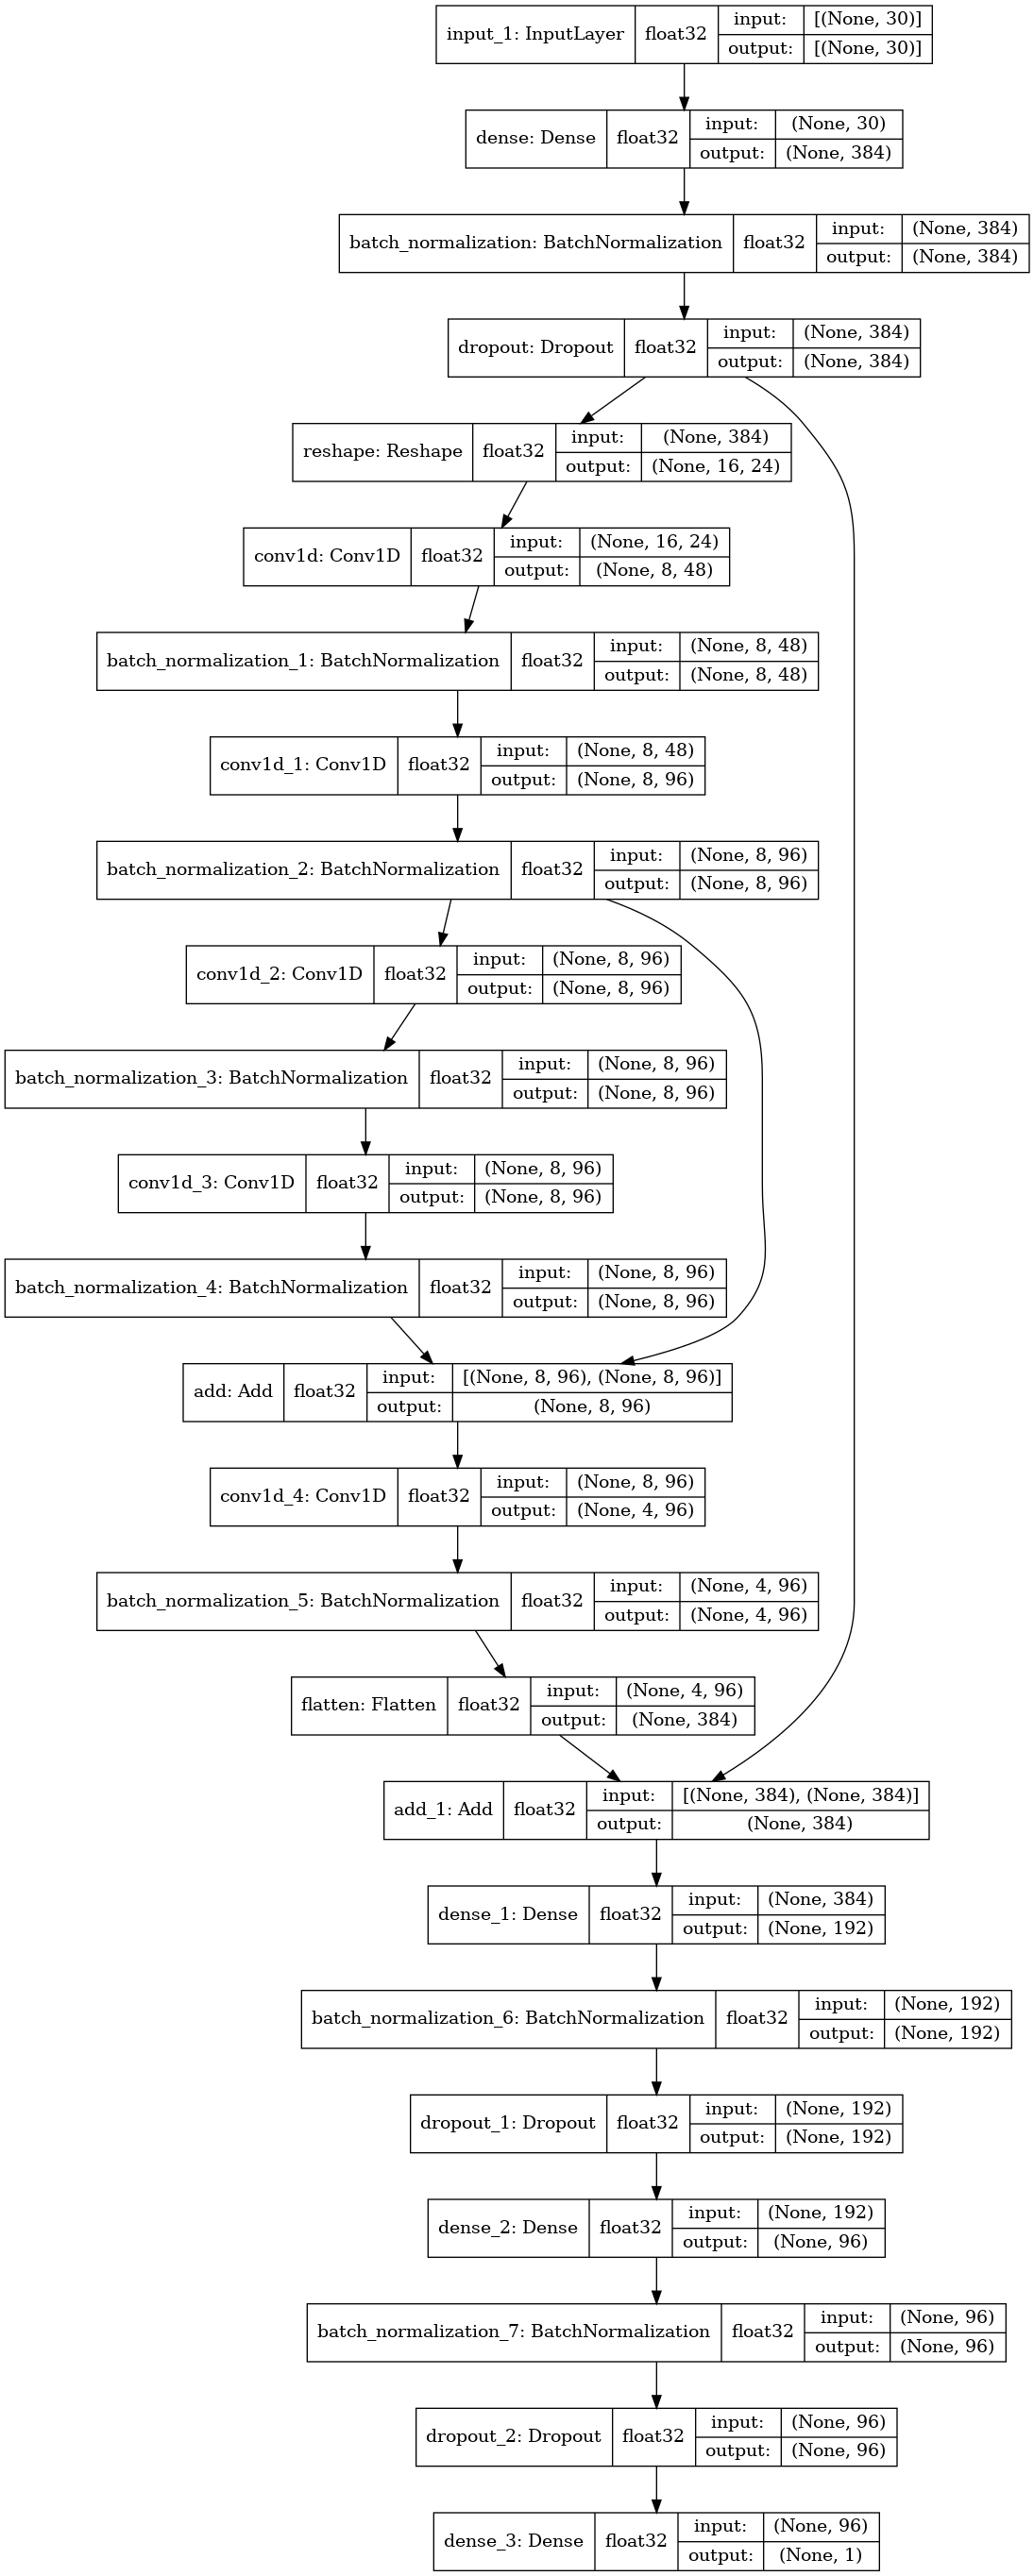

In [81]:
# Check model architecture
tf.keras.utils.plot_model(model,show_shapes=True, show_dtype=True)

In [82]:
history.history.keys()

dict_keys(['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc', 'val_loss', 'val_tp', 'val_fp', 'val_tn', 'val_fn', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_prc', 'lr'])

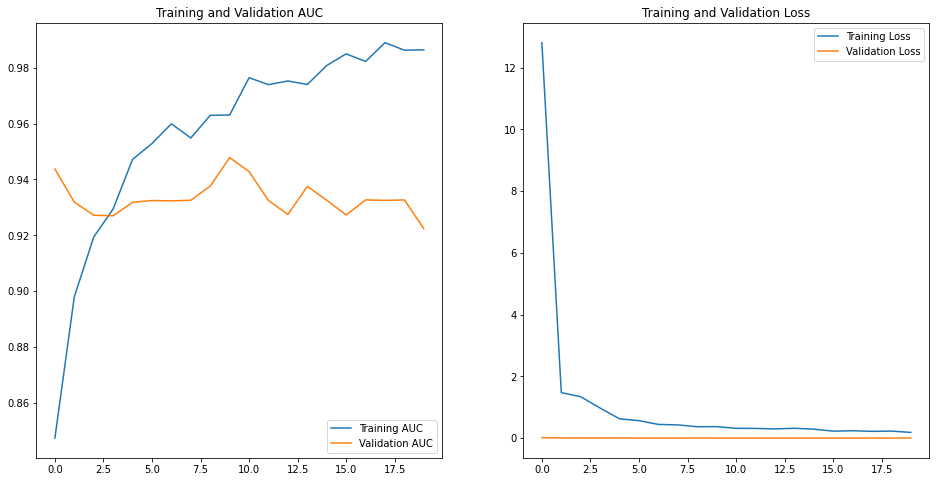

In [83]:
import matplotlib.pyplot as plt

acc = history.history['auc']
val_acc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = history.epoch

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC')
plt.plot(epochs_range, val_acc, label='Validation AUC')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [84]:
# Load the best model
best_model = tf.keras.models.load_model('CRD_FRD_May22_TF_Model.h5')
eval_result = best_model.evaluate(x_val, y_val, verbose=0)

print("Eval is done. Performance:\n")
for name, value in zip(best_model.metrics_names, eval_result):
  print(name, ': ', value)
print()

Eval is done. Performance:

loss :  0.0041462997905910015
tp :  80.0
fp :  21.0
tn :  50994.0
fn :  17.0
accuracy :  0.9992565512657166
precision :  0.7920792102813721
recall :  0.8247422575950623
auc :  0.9478009343147278
prc :  0.7957548499107361



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51015
           1       0.79      0.82      0.81        97

    accuracy                           1.00     51112
   macro avg       0.90      0.91      0.90     51112
weighted avg       1.00      1.00      1.00     51112



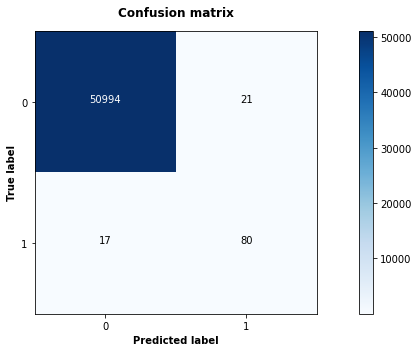

In [85]:
# Model prediction
pred = best_model.predict(x_val)
pred_label = tf.round(pred)

# Classification report
print(classification_report(y_val, pred_label))

# Confusion matrix
cnf_matrix = confusion_matrix(y_val, pred_label, labels=[0, 1])
np.set_printoptions(precision=2)
plt.figure(figsize=(12, 5))
plot_confusion_matrix(cnf_matrix, classes=[0, 1])

## Performance on the test set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28459
           1       0.71      0.68      0.70        22

    accuracy                           1.00     28481
   macro avg       0.86      0.84      0.85     28481
weighted avg       1.00      1.00      1.00     28481



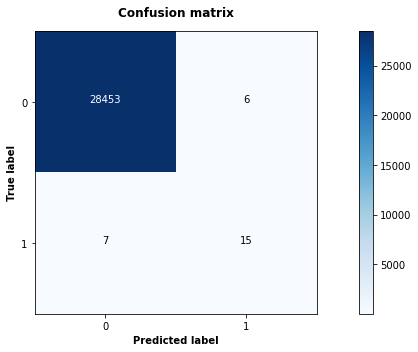

In [86]:
# Model prediction
final_pred = best_model.predict(x_test)
final_pred_label = tf.round(final_pred)

# Classification report
print(classification_report(y_test, final_pred_label))

# Confusion matrix
final_cnf_matrix = confusion_matrix(y_test, final_pred_label, labels=[0, 1])
np.set_printoptions(precision=2)
plt.figure(figsize=(12, 5))
plot_confusion_matrix(final_cnf_matrix, classes=[0, 1])

**Conclusion:** The precision of the best model built by TensorFlow is slightly less than the XGBoost.